In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 导入 tensorflow。mnist 数据集工具包
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 载入数据集
# 
# 下载 数据集
# 将标签转换为 one_hot 编码形式
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# tensorflow 版本更新,以前的数据集下载等 方法将不再支持,回警告！！！

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 定义迭代次数
epochs = 4

# 定义每次批次的大小
batch_size = 100
# 定义批次次数
n_batch = mnist.train.num_examples // batch_size

# 打印
print(n_batch)

550


In [4]:
# 创建 3 个占位符
# 
# 输入样本、输入标签
x = tf.placeholder(dtype=tf.float32, shape=(None, 784), name='input_x')
y = tf.placeholder(dtype=tf.float32, shape=(None, 10), name='input_y')

# dropout 参数设置
keep_prob = tf.placeholder(dtype=tf.float32, name='keep_prob')

In [5]:
# 创建神经网络
# 
# 输入层
weight_L1 = tf.Variable(tf.truncated_normal(shape=(784, 2000), mean=0, stddev=0.1))
biase_L1 = tf.Variable(tf.zeros(shape=(1, 2000)) + 0.1)
wx_plus_b_L1 = tf.matmul(x, weight_L1) + biase_L1

# 双曲正切函数作为激活函数
L1 = tf.nn.tanh(x=wx_plus_b_L1)

# Dropout 层
# 
# x 为该层神经元输出，keep_prob 为每层神经元工作比
L1_dropout = tf.nn.dropout(x=L1, keep_prob=keep_prob)

In [6]:
# 中间层
# 
weight_L2 = tf.Variable(tf.truncated_normal(shape=(2000, 2000), mean=0, stddev=0.1))
biase_L2 = tf.Variable(tf.zeros(shape=(1, 2000)) + 0.1)
wx_plus_b_L2 = tf.matmul(L1_dropout, weight_L2) + biase_L2

# 激活函数 tanh()
L2 = tf.nn.tanh(x=wx_plus_b_L2)

# Dropout 层
# 
L2_dropout = tf.nn.dropout(x=L2, keep_prob=keep_prob)

# # 创建输出层
# prediction = tf.nn.softmax(wx_plus_b_L2)

In [7]:
# 输出层
# 
weight_L3 = tf.Variable(tf.truncated_normal(shape=(2000, 10), mean=0, stddev=0.1))
biase_L3 = tf.Variable(tf.truncated_normal(shape=(1, 10), mean=0, stddev=0.1))
wx_plus_b_L3 = tf.matmul(L2_dropout, weight_L3) + biase_L3

# 激活函数 tanh()
prediction = tf.nn.softmax(wx_plus_b_L3)

In [8]:
# 损失函数、优化器
# 
# 定义损失函数
# loss = tf.reduce_mean(tf.square(y - prediction))
# 
# 定义损失函数 对数似然代价函数与 soft 组合
# 
# 训练时间、准确度有所提升
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

# 创建优化器，优化损失函数
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
# 判断准去率
# 
# tf.equal(x, y),判断 x, y 是否相等，返回 bool 类型 (tensor 里的值为 bool)
# tf.argmax() 查找最大值，返回索引值
# tensor 的轴(是从 0 开始的)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))

# tf.case() 将 bool 类型,转换为 tf.float 类型
# 
# 疑问：acc 为什么 会有 4 位小数，出现呢？(tensor(100, 10), 里面不 1 就是 0)，我怎么感觉顶天就是 2 位小数
# 解答：准确率是测试集，测试的(10000)张照片,固有 4 位小数出现
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# 保存模型
saver = tf.train.Saver()

In [10]:
# 初始化图中变量
init_op = tf.global_variables_initializer()

Ietr 0  Testing Accuracy 0.9208   Train Accuracy 0.91696364   res_loss= 1.5957496
Ietr 1  Testing Accuracy 0.9343   Train Accuracy 0.9330364   res_loss= 1.5946107
Ietr 2  Testing Accuracy 0.9365   Train Accuracy 0.9402182   res_loss= 1.504468
Ietr 3  Testing Accuracy 0.9433   Train Accuracy 0.9458182   res_loss= 1.5046228


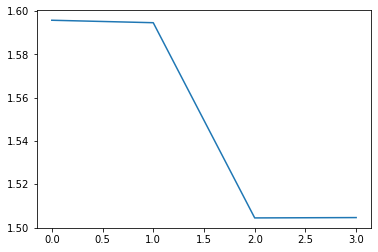

(10000, 784)
<class 'numpy.float32'>


In [11]:
# 创建会话
with tf.Session() as sess:
    sess.run(init_op)
    # 定义列表存储 loss
    # 迭代 21 个周期
    loss_list = []
    for epoch in range(epochs):
        # 执行批次数
        for batch in range(n_batch):
            # 一个批次获取照片数 batch_size
            train_x, train_y = mnist.train.next_batch(batch_size=batch_size)
           
            # res_loss 为 loss, res_train ?
            # 训练迭代时，处最后一层外的其他层有 keep_prob 的比例工作
            res_loss, res_train = sess.run([loss, train], feed_dict={x: train_x, y: train_y, keep_prob: 0.7})
        
        # 计算网络 准确率
        # 测试 Dropout 设为 1， 全部神经网络都工作
        test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
        train_acc = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels, keep_prob: 1.0})
        
        # 保存训练模型参数
        saver.save(sess=sess, save_path='net/my_model')
        
        # 将每一次迭代 loss 记录
        loss_list.append(res_loss)
        print('Ietr ' + str(epoch) + '  Testing Accuracy ' + str(test_acc), '  Train Accuracy ' + str(train_acc), '  res_loss=', res_loss)
        
    # 画出 loss-epoch 关系图
    plt.figure()
    plt.plot(list(range(epochs)), loss_list)
    plt.show()
        
    print(mnist.test.images.shape)
    print(type(test_acc))